# Descarga del dataset

A continuación se procede a descargar el dataset y la explicación de sus atributos. Puedes ver la desscripción de las variables en el siguiente enlace:




In [277]:
#añade las librerías básicas que consideres necesarias para el proyecto (pongo 3). Posteriormente podrás añadir más librerías.
import os
import numpy as np
import pandas as pd

## Carga del fichero en Python
df_train = pd.read_csv('train.csv', delimiter=',')
df_test = pd.read_csv('test.csv', delimiter=',')
df_submission = pd.read_csv('gender_submission.csv', delimiter=',')
df_train.head()
#df_test.head()
#df_submission.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Enunciado

*  https://www.kaggle.com/competitions/titanic/data

* The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features

* The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

* We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.



# 1. Análisis del dataset

Antes de comenzar con el preprocesamiento de los datos necesitamos analizarlos y entender un poco el dataset. Utiliza las diferentes funciones y gráficos que hemos visto para hacerte una idea del dataset con el que estamos trabajando. Esta información guiará el preprocesamiento de los datos.

In [278]:
# Verificar la información básica del DataFrame
print(df_train.info())

# Verificar valores faltantes
print(df_train.isnull().sum())

# Estadísticas descriptivas
print(df_train.describe())

# Verificar la distribución de la variable objetivo 'Survived'
print(df_train['Survived'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int6

# 2. Preprocesamiento del dataset


Dentro del preprocesamiento del dataset puedes utilizar diferentes técnicas como:**

*   Baleancear los datos
*   Eliminar columnas por los motivos que consideres (muchos valores nulos, no está correlacionado con la clase a predecir, ...)
*   Modificar columnas. Por ejemplo sutituir valores nulos por otros, clasificar una columna numérica en diferentes grupos (por ejemplo, cuartiles), ...
*   Crear nuevas columnas. Por ejemplo eliminando columnas categóricas, agregando un conjunto de columnas en otra, ...
*   Normalizar los datos
*   ...
*   

Al finalizar, deberás implementar un pipeline que paso a paso realice todo el preprocesamiento de los datos. De aquellos pasos que consideres necesarios, por ejemplo, el balanceamiento del dataset se deberá realizar fuera de un pipeline.


In [279]:
from sklearn.utils import resample

# Balanceo de datos con resample
# Dividir el dataframe en clases según la columna 'Survived'
df_class_0 = df_train[df_train.Survived == 0]
df_class_1 = df_train[df_train.Survived == 1]

# Determinar la clase con el mayor número de ocurrencias
max_size = max(len(df_class_0), len(df_class_1))

# Sobremuestrear las clases minoritarias para que todas tengan el mismo número de ocurrencias
df_class_0_upsampled = resample(df_class_0, n_samples=max_size, replace=True, random_state=42)
df_class_1_upsampled = resample(df_class_1, n_samples=max_size, replace=True, random_state=42)

# Combinar las clases balanceadas
df_balanced = pd.concat([df_class_0_upsampled, df_class_1_upsampled])

# Verificar el número de ocurrencias por clase en el dataset balanceado
print(f"Número de ocurrencias clase 0: {len(df_balanced[df_balanced.Survived == 0])}")
print(f"Número de ocurrencias clase 1: {len(df_balanced[df_balanced.Survived == 1])}")


Número de ocurrencias clase 0: 549
Número de ocurrencias clase 1: 549


In [280]:
from sklearn.base import BaseEstimator, TransformerMixin

# Eliminar columnas innecesarias
class EliminarColumnas(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.drop(columns=self.columns, errors='ignore')


In [281]:
from sklearn.base import BaseEstimator, TransformerMixin

# transforma la columna categórica 'Sex' en numérica
class SexColumnTransformer(BaseEstimator, TransformerMixin):
    index_map = {'Male': 1, 'Female': 0}

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_transformed = X.copy()
        if 'Sex' in X_transformed.columns:
            X_transformed['Sex'] = X_transformed['Sex'].map(self.index_map).fillna(0)
        return X_transformed


In [282]:
from sklearn.base import BaseEstimator, TransformerMixin

# Rellena nulos solo para columnas numéricas
class RellenaNulos(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        # Calculamos la media solo para las columnas numéricas
        self.medias = X.select_dtypes(include=['float64', 'int64']).mean()
        return self

    def transform(self, X):
        # Rellenamos los valores nulos de las columnas numéricas
        X = X.copy()  # Crear una copia para evitar modificar el original
        X.loc[:, self.medias.index] = X.loc[:, self.medias.index].fillna(self.medias)
        return X


In [283]:
from sklearn.base import BaseEstimator, TransformerMixin

# Normalizador
class MiNormalizador(BaseEstimator, TransformerMixin):
    def __init__(self, columnas):
        # Recibimos una lista de columnas a normalizar
        self.columnas = columnas

    def fit(self, X, y=None):
        # Verificamos que todas las columnas existan en el DataFrame
        for columna in self.columnas:
            if columna not in X.columns:
                raise ValueError(f"La columna '{columna}' no existe en el DataFrame.")

        # Guardamos los valores mínimos y máximos de cada columna
        self.minimos = X[self.columnas].min()
        self.maximos = X[self.columnas].max()
        return self

    def transform(self, X):
        # Creamos una copia del DataFrame para no modificar el original
        X_copy = X.copy()

        # Normalizamos cada columna usando la fórmula de normalización
        for columna in self.columnas:
            X_copy[columna] = (X_copy[columna] - self.minimos[columna]) / (self.maximos[columna] - self.minimos[columna])

        return X_copy


In [284]:
from sklearn.pipeline import Pipeline

# Definir columnas a eliminar
columnas_a_eliminar = ['Name', 'Ticket', 'Cabin', 'PassengerId']  # Ejemplo de columnas irrelevantes
columnas_a_normalizar = ['Age', 'Fare', 'SibSp', 'Parch']
# Añadimos el pipeline
pipeline = Pipeline(steps=[
    ('eliminar_columnas', EliminarColumnas(columns=columnas_a_eliminar)),
    ('rellenar_nulos', RellenaNulos()),
    ('sex_column', SexColumnTransformer()),
    ('normalizador', MiNormalizador(columnas=columnas_a_normalizar))
])


In [285]:
# Aplicamos el pipeline al dataset
df_transformado = pipeline.fit_transform(df_train)

df_transformado


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0.0,0.271174,0.125,0.000000,0.014151,S
1,1,1,0.0,0.472229,0.125,0.000000,0.139136,C
2,1,3,0.0,0.321438,0.000,0.000000,0.015469,S
3,1,1,0.0,0.434531,0.125,0.000000,0.103644,S
4,0,3,0.0,0.434531,0.000,0.000000,0.015713,S
...,...,...,...,...,...,...,...,...
886,0,2,0.0,0.334004,0.000,0.000000,0.025374,S
887,1,1,0.0,0.233476,0.000,0.000000,0.058556,S
888,0,3,0.0,0.367921,0.125,0.333333,0.045771,S
889,1,1,0.0,0.321438,0.000,0.000000,0.058556,C


# 3. Definición de modelos diferentes a redes neuronales

En este apartado podrás utilizar el algoritmo que consideres que ofrece mejores resultados para la generación del modelo. Para ello deberás realizar varios modelos y evaluarlos para quedarte con el que mejores resultados ofrezca.

In [286]:
from sklearn.model_selection import train_test_split

# Separar las características (X) y la variable objetivo (y)
X = df_transformado.drop('Survived', axis=1)  # 'Survived' es la variable objetivo
y = df_transformado['Survived']  # Variable objetivo

# Dividimos los datos en conjuntos de entrenamiento (95%) y prueba (5%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

# Verificamos los tamaños de los conjuntos
print("Tamaño de X_train:", X_train.shape)
print("Tamaño de y_train:", y_train.shape)
print("Tamaño de X_test:", X_test.shape)
print("Tamaño de y_test:", y_test.shape)


Tamaño de X_train: (846, 7)
Tamaño de y_train: (846,)
Tamaño de X_test: (45, 7)
Tamaño de y_test: (45,)


In [287]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer

# Definir columnas a eliminar
columnas_a_eliminar = ['Name', 'Ticket', 'Cabin', 'PassengerId']  # Ejemplo de columnas irrelevantes
columnas_a_normalizar = ['Age', 'Fare', 'SibSp', 'Parch']

# Creamos el transformador
class Transformador1(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        # Convertir X a DataFrame si es un ndarray
        if isinstance(X, np.ndarray):
            X = pd.DataFrame(X)
        self.numeric_columns = list(X.dtypes[X.dtypes != 'object'].index)
        return self

    def transform(self, X):
        # Convertir X a DataFrame si es un ndarray
        if isinstance(X, np.ndarray):
            X = pd.DataFrame(X)
        return X[self.numeric_columns]


# pipeline con KNN
pipeline1 = Pipeline([
    ('transformador1', Transformador1()),
    ('eliminar_columnas', EliminarColumnas(columns=columnas_a_eliminar)),
    ('rellenar_nulos', RellenaNulos()),
    ('sex_transform', SexColumnTransformer()),
    ('normalizador', MiNormalizador(columnas=columnas_a_normalizar)),
    ('imputador', SimpleImputer(strategy='mean')), # transformador que se encarga de manejar los valores faltantes (NAN/null)
    ('scaler', StandardScaler()),  # Estandarización de los datos
    ('knn', KNeighborsClassifier(n_neighbors=3, weights='distance', algorithm='auto'))  # euclidean
])

# pipeline con SVM1
pipeline2 = Pipeline([
    ('transformador1', Transformador1()),
    ('eliminar_columnas', EliminarColumnas(columns=columnas_a_eliminar)),
    ('rellenar_nulos', RellenaNulos()),
    ('sex_transform', SexColumnTransformer()),
    ('normalizador', MiNormalizador(columnas=columnas_a_normalizar)),
    ('imputador', SimpleImputer(strategy='mean')), # transformador que se encarga de manejar los valores faltantes (NAN/null)
    ('scaler', StandardScaler()),  # Estandarización de los datos
    ('svm', SVC(C=1, kernel='linear', random_state=42))  # SVM con kernel lineal
])

# pipeline con SVM2
pipeline3 = Pipeline([
    ('transformador1', Transformador1()),
    ('eliminar_columnas', EliminarColumnas(columns=columnas_a_eliminar)),
    ('rellenar_nulos', RellenaNulos()),
    ('sex_transform', SexColumnTransformer()),
    ('normalizador', MiNormalizador(columnas=columnas_a_normalizar)),
    ('imputador', SimpleImputer(strategy='mean')), # transformador que se encarga de manejar los valores faltantes (NAN/null)
    ('scaler', StandardScaler()),  # Estandarización de los datos
    ('svm', SVC(C=1, kernel='rbf', random_state=42))  # SVM con kernel rbf
])

# pipeline con SVM3
pipeline4 = Pipeline([
    ('transformador1', Transformador1()),
    ('eliminar_columnas', EliminarColumnas(columns=columnas_a_eliminar)),
    ('rellenar_nulos', RellenaNulos()),
    ('sex_transform', SexColumnTransformer()),
    ('normalizador', MiNormalizador(columnas=columnas_a_normalizar)),
    ('imputador', SimpleImputer(strategy='mean')), # transformador que se encarga de manejar los valores faltantes (NAN/null)
    ('scaler', StandardScaler()),  # Estandarización de los datos
    ('svm', SVC(C=0.1, kernel='linear', random_state=42))  # SVM con kernel lineal
])

# pipeline con Árboles de Decisión
pipeline5 = Pipeline([
    ('transformador1', Transformador1()),
    ('eliminar_columnas', EliminarColumnas(columns=columnas_a_eliminar)),
    ('rellenar_nulos', RellenaNulos()),
    ('sex_transform', SexColumnTransformer()),
    ('normalizador', MiNormalizador(columnas=columnas_a_normalizar)),
    ('imputador', SimpleImputer(strategy='mean')), # transformador que se encarga de manejar los valores faltantes (NAN/null)
    ('scaler', StandardScaler()),  # Estandarización de los datos
    ('decisiontree', DecisionTreeClassifier(max_depth=3, random_state=42))  # Árbol de Decisión
])


In [288]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Configurar la validación cruzada con StratifiedKFold
k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluar el pipeline con validación cruzada | KNN
scores_knn1 = cross_val_score(pipeline1, X_train, y_train, cv=k_fold, scoring='accuracy')
# Evaluar el pipeline con validación cruzada | svm
scores_svm1 = cross_val_score(pipeline2, X_train, y_train, cv=k_fold, scoring='accuracy')
# Evaluar el pipeline con validación cruzada | svm
scores_svm2 = cross_val_score(pipeline3, X_train, y_train, cv=k_fold, scoring='accuracy')
# Evaluar el pipeline con validación cruzada | svm
scores_svm3 = cross_val_score(pipeline4, X_train, y_train, cv=k_fold, scoring='accuracy')
# Evaluar el pipeline con validación cruzada | decisiontree
scores_dt = cross_val_score(pipeline5, X_train, y_train, cv=k_fold, scoring='accuracy')


# Imprimir la precisión media en la validación cruzada
print("Precisión media con KNN:", scores_knn1.mean())
# Imprimir la precisión media en la validación cruzada
print("Precisión media con SVM - 1:", scores_svm1.mean())
# Imprimir la precisión media en la validación cruzada
print("Precisión media con SVM - 2:", scores_svm2.mean())
# Imprimir la precisión media en la validación cruzada
print("Precisión media con SVM - 3:", scores_svm3.mean())
# Imprimir la precisión media en la validación cruzada
print("Precisión media con DT:", scores_dt.mean())


Precisión media con KNN: 0.679721545422903
Precisión media con SVM - 1: 0.7068499825965889
Precisión media con SVM - 2: 0.7257570483814828
Precisión media con SVM - 3: 0.6891054646710755
Precisión media con DT: 0.6855899756352245


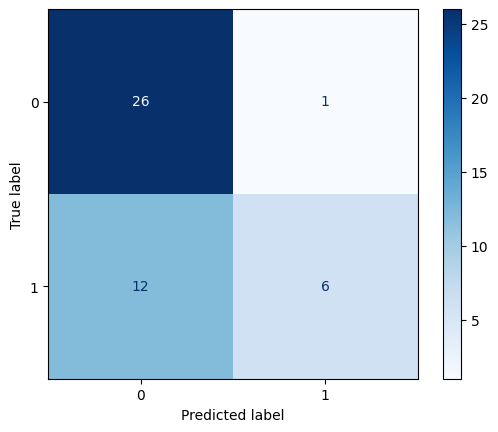

In [289]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

best_pipeline = pipeline3
# Entrenar el modelo con los datos de entrenamiento
best_pipeline.fit(X_train, y_train)

# Predecir las etiquetas para el conjunto de validación
y_pred = best_pipeline.predict(X_test)

# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_pipeline.classes_)
disp.plot(cmap='Blues')


# 4. Definición de modelo basado en red neuronal

En este apartado deberás entrenar una red neuronal ajustando la arquitectura y el entrenamiento a los mejores resultados de evaluación.

In [290]:
import numpy as np
from keras.models import Sequential
# from keras.layers.core import Dense
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
# Convertimos solo las columnas categóricas
for col in X_train.select_dtypes(include=['object']).columns:
    X_train[col] = label_encoder.fit_transform(X_train[col])

model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(7,)))  # Capa de entrada con 16 neuronas input_shape = columnas
model.add(Dense(1, activation='sigmoid'))  # Capa de salida para clasificación binaria
model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['binary_accuracy'])  # Compilamos el modelo

# Entrenar el modelo en los datos de entrenamiento
model.fit(X_train, y_train, epochs=50)

# evaluamos el modelo
scores = model.evaluate(X_train, y_train)

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print (model.predict(X_train).round())



Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - binary_accuracy: 0.6237 - loss: 0.2319   
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.6483 - loss: 0.2247 
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.6405 - loss: 0.2262 
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.6683 - loss: 0.2168 
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.6338 - loss: 0.2218 
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.6607 - loss: 0.2144 
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.6711 - loss: 0.2120 
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.6597 - loss: 0.2152 
Epoch 9/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.6951 - loss: 0.2063 
Epoch 10/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.6769 - loss: 0.2115 
Epoch 11/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.6612 - loss: 0.2

In [291]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Cargar datos
data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Escalador para normalizar los datos
    ('mlp', MLPClassifier(max_iter=10000, random_state=42))  # Modelo
])

# Entrenar el modelo con el pipeline
pipeline.fit(X_train, y_train)

# Evaluación
accuracy = pipeline.score(X_test, y_test)
print(f"Precisión: {accuracy:.2f}")

Precisión: 1.00
